In [1]:
import numpy as np

# シード固定
np.random.seed(0)
rewards = []

for n in range(1, 11): # 1から10まで
    reward = np.random.rand()
    rewards.append(reward)
    Q = sum(rewards) / n
    print(Q)

0.5488135039273248
0.6320014351498722
0.6222554154571295
0.6029123573420713
0.567060845741438
0.5801997236289743
0.5598265075766483
0.6013198192273272
0.6415801460355164
0.6157662833145425


In [2]:
Q = 0

for n in range(1, 11):
    reward = np.random.rand()
    Q = Q + (reward - Q) / n
    print(Q)

0.7917250380826646
0.6603099789177845
0.6295548396431672
0.7035652893055406
0.5770594430840099
0.49540441918693173
0.4275207017945595
0.4781580947637318
0.5114912787844116
0.5473433657306523


### スロットマシンの実装

- これまで実際にプレイした結果を利用して、最善と思われるスロットマシンをプレイすること（=greedyな行動）
→活用
- スロットマシンの価値を精度良く推定するために、様々なスロットマシンを試すこと
→探索

In [3]:
class Bandit:
    def __init__(self, arms=10):
        self.rates = np.random.rand(arms) # 各マシンの勝率
    
    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1
        else:
            return 0

In [4]:
bandit = Bandit()

for i in range(3):
    print(bandit.play(0))

1
1
1


### エージェントの実装

In [7]:
bandit = Bandit()
Q = 0

for n in range(1, 11):
    reward = bandit.play(0) # 0番目のスロットマシンをプレイ
    Q += (reward - Q) / n
    print(Q)

0.0
0.0
0.3333333333333333
0.25
0.4
0.33333333333333337
0.4285714285714286
0.375
0.3333333333333333
0.4


In [8]:
bandit = Bandit()
Qs = np.zeros(10)
ns = np.zeros(10)

for n in range(10):
    action = np.random.randint(0, 10) # ランダムな行動（スロットマシンを選択）
    reward = bandit.play(action)

    ns[action] += 1
    Qs[action] += (reward - Qs[action]) / ns[action]

In [9]:
class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)
    
    def update(self, action, reward):
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]
    
    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)

849


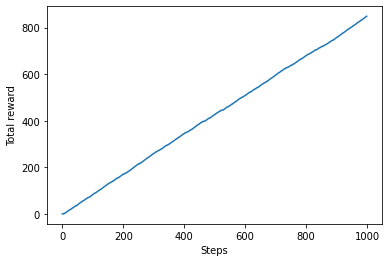

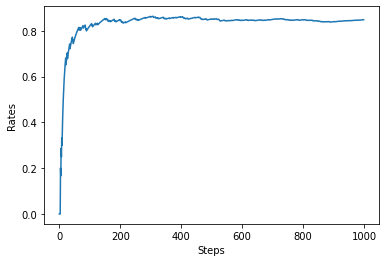

In [10]:
import matplotlib.pyplot as plt

steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
    action = agent.get_action() # ①行動を選ぶ
    reward = bandit.play(action) # ②実際にプレイして報酬を得る
    agent.update(action, reward) # ③行動と報酬から学ぶ
    total_reward += reward

    total_rewards.append(total_reward)
    rates.append(total_reward / (step+1))
print(total_reward)

# グラフの描画（1）
plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

# グラフの描画（2）
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

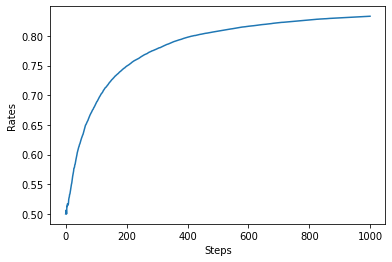

In [11]:
# スロットマシンを1000回プレイするという、実験を200回行う
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps)) # (200, 1000)の形状

for run in range(runs): # 200回の実施
    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    rates = []

    for step in range(steps):
        action = agent.get_action() # ①行動を選ぶ
        reward = bandit.play(action) # ②実際にプレイして報酬を得る
        agent.update(action, reward) # ③行動と報酬から学ぶ
        total_reward += reward

        rates.append(total_reward / (step+1))
    
    all_rates[run] = rates # ④報酬の結果を記録する
avg_rates = np.average(all_rates, axis=0) # ⑤各ステップにおける平均を求める

# グラフの描画
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()

### 非定常問題

In [12]:
class NonStatBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.rates = np.random.rand(arms)
    
    def play(self, arm):
        rate = self.rates[arm]
        self.rates += 0.1 * np.random.randn(self.arms) # ノイズを追加
        if rate > np.random.rand():
            return 1
        else:
            return 0

### 非定常問題を解く

In [13]:
class AlphaAgent:
    def __init__(self, epsilon, alpha, actions=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(actions)
        self.alpha = alpha
    
    def update(self, action, reward):
        # alphaで更新
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha
    
    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)